Preprocessing

In [1]:
#Import required packages

import pandas as pd
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from librosa import display
from datetime import datetime

In [2]:
#Load fma data set

sound_features = pd.read_csv('C:/Data/fma_metadata/features.csv',sep=',', header=[0, 1, 2], index_col = 0)
sound_features.index = sound_features.index.map(np.int)

In [3]:
#Load popularities from Spotif

popularities = pd.read_csv("C:/Data/tracksinspotify.csv")
popularities = popularities.set_index("track_id")
popularities = popularities.drop(columns=["spotify_id", "Unnamed: 0"])

In [4]:
#Join Lables to sound features and drop songs without spotify match

sound_features_columns = sound_features.columns
sound_features = sound_features.join(popularities)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:617: UserWarning: merging between different levels can give an unintended result (3 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


In [5]:
#Delete rows with null values e.g. no matches from Spotify

sound_features = sound_features.dropna()

In [6]:
#Delete duplicate rows

sound_features = sound_features.drop_duplicates()

In [7]:
#Clean data sets

popularities = sound_features["popularity"]
sound_features = sound_features.drop(columns=["popularity"])
sound_features.columns = sound_features_columns

In [8]:
#Have a look

sound_features.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
141           0.172898 -0.284804 -1.169662 -1.062855 -0.706868 -0.708281   
149          -0.386733 -0.545598 -0.638649 -0.669786 -0.522530 -0.809405   
150          -0.083043  0.142131 -0.466703  1.447829 -0.324532  0.098253   
153           2.437779  0.886211  2.899974  1.726185  1.248919  0.676350   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
141        -0.204884  0.023624 -0.642770 -0.786291  ...  0.145994  0.024342   
149        -0.814669 -0.304319 -0.238370 -0.208790  ...  0.072945  0.031259   
150        -0.560927 -0.524895 -0.277307 -0.467008  ...  0.091688  0.024105   
153         0.174806  0.327476  0.356982  0.497109  ...  0.063820  0.016608   

feature                      zcr                                          \
statistics              kurtosis       max      mean    median       min   
number            06          01        01        01        01        01   
track_id                                                                   
10          0.013921   21.434212  0.452148  0.077515  0.071777  0.000000   
141         0.032111   32.994659  0.415527  0.040267  0.034668  0.002930   
149         0.030753   19.319490  0.559082  0.045064  0.028320  0.000000   
150         0.021738   10.283248  0.520996  0.038384  0.019531  0.001465   
153         0.015160  179.469254  0.852051  0.061346  0.059082  0.000000   

feature                          
statistics       skew       std  
number             01        01  
track_id                         
10           3.542325  0.040800  
141          4.204097  0.028665  
149          4.167562  0.060894  
150          3.125291  0.056584  
153         12.755673  0.052093  

[5 rows x 518 columns]

In [9]:
popularities.head()

track_id
10     32.0
141     1.0
149     0.0
150     0.0
153     0.0
Name: popularity, dtype: float64

In [10]:
#some advanced indexing
#print(sound_features.columns)
#idx = pd.IndexSlice
#sound_features.loc[:,idx[:,("mean","std")]]

In [11]:
#Label Binarization with 75% Quartile of label histogram wihtout considering zeros

popularities_binary = popularities > 12
popularities[popularities > 0].describe()

count    8777.000000
mean        8.399909
std         9.518324
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max        70.000000
Name: popularity, dtype: float64

In [12]:
#feature standardization

sound_features_scaled = pd.DataFrame(preprocessing.scale(sound_features))
sound_features_scaled.index = sound_features.index
sound_features_scaled.columns = sound_features.columns

sound_features_scaled.head()

feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
10            0.098270 -0.142754  0.247059 -0.179897  0.335924  0.164760   
141          -0.007384 -0.139845 -0.185768 -0.793912 -0.212114 -0.172588   
149          -0.024137 -0.258592 -0.117494 -0.502569 -0.163410 -0.192576   
150          -0.015046  0.054553 -0.095387  1.067011 -0.111096 -0.013167   
153           0.060417  0.393356  0.337475  1.273329  0.304629  0.101100   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
10          0.099122  0.051158  0.144499  0.382049  ... -0.840756 -0.688949   
141        -0.022981 -0.010096 -0.172766 -0.191981  ...  1.082060  0.394147   
149        -0.060669 -0.022802 -0.062540 -0.072248  ... -0.878681  1.566411   
150        -0.044986 -0.031348 -0.073152 -0.125784  ... -0.375602  0.353985   
153         0.000486  0.001677  0.099734  0.074107  ... -1.123614 -0.916785   

feature                    zcr                                          \
statistics            kurtosis       max      mean    median       min   
number            06        01        01        01        01        01   
track_id                                                                 
10         -1.397420 -0.148531  0.332249  1.121906  1.301452 -0.637579   
141         1.641962  0.014993  0.139812 -0.363023 -0.274394  0.105054   
149         1.414967 -0.178444  0.894167 -0.171801 -0.543946 -0.637579   
150        -0.091373 -0.306264  0.694032 -0.438080 -0.917173 -0.266262   
153        -1.190456  2.086903  2.433665  0.477320  0.762347 -0.637579   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
10          0.006404  0.101855  
141         0.223771 -0.393111  
149         0.211771  0.921404  
150        -0.130576  0.745634  
153         3.032647  0.562425  

[5 rows x 518 columns]

In [13]:
#Validation set split
from sklearn.model_selection import train_test_split

data_train, data_validation, target_train, target_validation = train_test_split(sound_features_scaled, popularities_binary, test_size=0.2, random_state=420)


In [14]:
#Stratified 5-fold sampling and balancing

from sklearn.model_selection import StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler

train_indices = []
train_indices_balanced = []
test_indices = []
skf = StratifiedKFold(n_splits = 4, random_state = 420, shuffle = True)
rus = RandomUnderSampler(random_state=420,sampling_strategy = 1)

for train_index, test_index in skf.split(data_train, target_train):
    #convert index to track_id
    train_index = data_train.index[train_index]
    test_index = data_train.index[test_index]
    
    #Balancing training set
    data_train_balanced, target_train_balanced = rus.fit_resample(data_train.loc[train_index], target_train.loc[train_index])
    
    #Creating lists for cv
    train_indices.append(train_index)
    test_indices.append(test_index)
    train_indices_balanced.append(train_index[rus.sample_indices_])

print("Total data set size\t"+str(len(sound_features_scaled))+' (relative amount popular songs: '+str(round(popularities_binary.value_counts()[1]/len(popularities_binary)*100,2))+'%)')
print("Training set size\t"+str(len(data_train))+' ('+str(round(target_train.value_counts()[1]/len(target_train)*100,2))+'%)')
print("Validation set size\t"+str(len(data_validation))+' ('+str(round(target_validation.value_counts()[1]/len(target_validation)*100,2))+'%)\r\n')

print("Cross-Validation splits:\r\ncv\ttrain\t\t\tbalanced\t\ttest")
for cv in range(0,4):
    print(str(cv)+'\t'+str(len(train_indices[cv])) +' ('+str(round(target_train.loc[train_indices[cv]].value_counts()[1]/len(train_indices[cv])*100,2))+'%)'
                  '\t\t'+str(len(train_indices_balanced[cv]))+' ('+str(round(target_train.loc[train_indices_balanced[cv]].value_counts()[1]/len(train_indices_balanced[cv])*100))+'%)'
                  '\t\t'+str(len(test_indices[cv]))+' ('+str(round(target_train.loc[test_indices[cv]].value_counts()[1]/len(test_indices[cv])*100,2))+'%)'
)

Total data set size	22608 (relative amount popular songs: 8.82%)
Training set size	18086 (8.95%)
Validation set size	4522 (8.29%)

Cross-Validation splits:
cv	train			balanced		test
0	13564 (8.95%)		2428 (50.0%)		4522 (8.96%)
1	13564 (8.95%)		2428 (50.0%)		4522 (8.96%)
2	13564 (8.95%)		2428 (50.0%)		4522 (8.96%)
3	13566 (8.96%)		2430 (50.0%)		4520 (8.94%)


In [15]:
'''
Dimensionality reduction

ACHTUNG PERFOMANCE!!
'''
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

#classifier = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, learning_rate = 0.1)
#evtl step auf 3 setzen um performance zu verbessern
#rfecv = RFECV(estimator=classifier, step=5, cv=StratifiedKFold(2),
#              scoring='accuracy')
#rfecv.fit(sound_features_scaled, popularities_binary)

#print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
#plt.figure()
#plt.xlabel("Number of features selected")
#plt.ylabel("Cross validation score (nb of correct classifications)")
#plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
#plt.show()

In [16]:
'''
DROP COLUMNS
'''
#data_train = data_train.loc[:,"chroma_stft":"chroma_stft.83"]
#data_test = data_test.loc[:,"chroma_stft":"chroma_stft.83"]
#data_train.head()


'\nDROP COLUMNS\n'

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc

def performance(target_test, predictions):
    
    conf_matrix = confusion_matrix(target_test,predictions)
    
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))    

    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))    

    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity)) 

    return conf_accuracy, conf_sensitivity, conf_specificity, conf_precision, conf_f1

In [18]:
#Create perfomance Dataframes
cv_perf = pd.DataFrame(columns = ['accuracy', 'sensitivity', 'specivity', 'precision', 'f1 score']
                  , index = pd.MultiIndex.from_arrays([[],[],[],[]], names =['classifier_name', 'coeff_value','balanced', 'cv']))
roc_perf = pd.DataFrame(columns = ['tpr', 'auc']
                  , index = pd.MultiIndex.from_arrays([[],[],[],[]], names =['classifier_name', 'coeff_value','balanced', 'cv']))

#Assign fpr value for tpr interpolation in ROC calculation
mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]

#Slicing pandas multiindex for perfomance Dataframes
idx = pd.IndexSlice

#Define function that runs crossvalidation for balanced and inbalanced data
def run_classifier(classifier, classifier_name, coeff_value):
    
    #cross-validation
    for cv in range(0,4):
        
        #Testing balanced and unbalanced
        for balanced in (True, False):
            print("starting to run cv " + str(cv) + ", balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))
            
            if(balanced):
                classifier.fit(data_train.loc[train_indices_balanced[cv]], target_train.loc[train_indices_balanced[cv]])
            else:
                classifier.fit(data_train.loc[train_indices[cv]], target_train.loc[train_indices[cv]])
            
            #performance
            predictions = classifier.predict(data_train.loc[test_indices[cv]])
            acc, sens, spec, prec, f1 = performance(target_train.loc[test_indices[cv]], predictions)
            cv_perf.loc[classifier_name, coeff_value if coeff_value else 'None',balanced, cv] = {'accuracy': acc, 'sensitivity': sens,'specivity': spec, 'precision': prec, 'f1 score': f1}
            
            #ROC
            predictions_probas = classifier.predict_proba(data_train.loc[test_indices[cv]])
            fpr, tpr, thresholds = roc_curve(target_train.loc[test_indices[cv]], predictions_probas[:,1])
            tprs = np.interp(mean_fpr, fpr, tpr)
            tprs[0] = 0.0 
            roc_perf.loc[classifier_name, coeff_value if coeff_value else 'None',balanced, cv] = {'tpr':tprs , 'auc': auc(fpr, tpr)}
            
            print("finished to run cv " + str(cv) + ", balanced=" + str(balanced) + " at " + str(datetime.now(tz=None)))

In [19]:
#function to plot crossvalidated ROC
def plot_roc(classifier_name, coeff_range):
    for balanced in (True,False):
        if(balanced):
            plt.title('ROC(cv mean) - balanced data - '+classifier_name)
        else:
            plt.title('ROC(cv mean) - unbalanced data - '+classifier_name)
        for c in coeff_range:
            mean_tpr = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"tpr"].values.mean()
            mean_tpr[-1] = 1.0 # set the last tpr to 1
            mean_auc = auc(mean_fpr, mean_tpr)
            std_auc = roc_perf.loc[idx[classifier_name,c if c else 'None',balanced,:],"auc"].values.std()
            plt.plot(mean_fpr, mean_tpr, label = '(coeff = '+str(c)+') AUC = '+str(round(mean_auc,4))+' (+/- '+str(round(std_auc,4))+')')
        plt.legend(loc = 'lower right')
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

#variables for KNN
classifier_name = 'KNeighborsClassifier'
coeff_range = range(3,8,2)
#Testing different n_neighbors
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = KNeighborsClassifier(n_neighbors=c, n_jobs = 2)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=3 at 2019-11-19 08:55:28.014807
starting to run cv 0, balanced=True at 2019-11-19 08:55:28.017799
finished to run cv 0, balanced=True at 2019-11-19 08:55:37.157571
starting to run cv 0, balanced=False at 2019-11-19 08:55:37.157571
finished to run cv 0, balanced=False at 2019-11-19 08:56:32.665981
starting to run cv 1, balanced=True at 2019-11-19 08:56:32.666979
finished to run cv 1, balanced=True at 2019-11-19 08:56:41.849713
starting to run cv 1, balanced=False at 2019-11-19 08:56:41.850710
finished to run cv 1, balanced=False at 2019-11-19 08:57:37.542844
starting to run cv 2, balanced=True at 2019-11-19 08:57:37.543840
finished to run cv 2, balanced=True at 2019-11-19 08:57:46.499170
starting to run cv 2, balanced=False at 2019-11-19 08:57:46.500167
finished to run cv 2, balanced=False at 2019-11-19 08:58:42.909668
starting to run cv 3, balanced=True at 2019-11-19 08:58:42.910666
finished to run cv 3, balanced=True at 2019-11-19 08:58:51.885659
starting to run cv 3

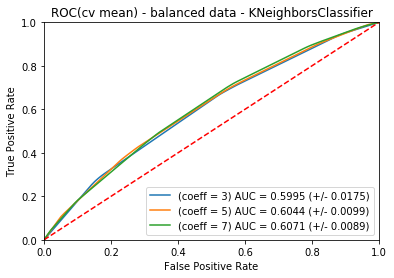

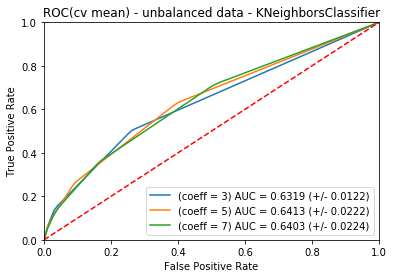

KNeighborsClassifier - Perfomance


accuracy  sensitivity  specivity  precision  f1 score
coeff_value balanced                                                       
3           False     0.893951     0.143916   0.967693   0.967693  0.250328
            True      0.475343     0.690539   0.454183   0.454183  0.547466
5           False     0.904125     0.076589   0.985486   0.985486  0.142006
            True      0.463179     0.704747   0.439426   0.439426  0.540719
7           False     0.907774     0.038295   0.993259   0.993259  0.073600
            True      0.451955     0.726372   0.424973   0.424973  0.535806

In [25]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()

In [26]:
from sklearn.tree import DecisionTreeClassifier
classifier_name = 'DecisionTreeClassifier'
coeff_range = (None, 10 , 5)

#Testing max tree sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = DecisionTreeClassifier(max_depth = c, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=None at 2019-11-19 09:08:31.075836
starting to run cv 0, balanced=True at 2019-11-19 09:08:31.086807
finished to run cv 0, balanced=True at 2019-11-19 09:08:32.135028
starting to run cv 0, balanced=False at 2019-11-19 09:08:32.135028
finished to run cv 0, balanced=False at 2019-11-19 09:08:42.858004
starting to run cv 1, balanced=True at 2019-11-19 09:08:42.858004
finished to run cv 1, balanced=True at 2019-11-19 09:08:43.715731
starting to run cv 1, balanced=False at 2019-11-19 09:08:43.716729
finished to run cv 1, balanced=False at 2019-11-19 09:08:55.303390
starting to run cv 2, balanced=True at 2019-11-19 09:08:55.304387
finished to run cv 2, balanced=True at 2019-11-19 09:08:56.260336
starting to run cv 2, balanced=False at 2019-11-19 09:08:56.260336
finished to run cv 2, balanced=False at 2019-11-19 09:09:08.143831
starting to run cv 3, balanced=True at 2019-11-19 09:09:08.143831
finished to run cv 3, balanced=True at 2019-11-19 09:09:09.177089
starting to run c

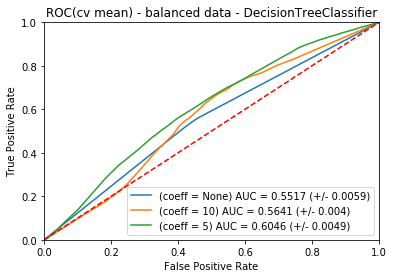

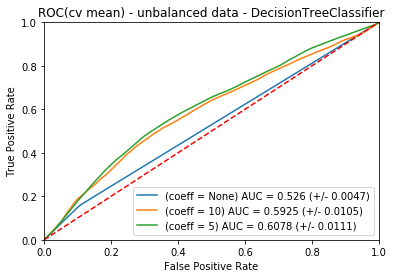

DecisionTreeClassifier - Perfomance


accuracy  sensitivity  specivity  precision  f1 score
coeff_value balanced                                                       
5           False     0.908272     0.004323   0.997146   0.997146  0.008587
            True      0.571996     0.601551   0.569082   0.569082  0.570726
10          False     0.887096     0.049416   0.969454   0.969454  0.093995
            True      0.532236     0.629393   0.522683   0.522683  0.569359
None        False     0.826994     0.159359   0.892634   0.892634  0.270402
            True      0.553796     0.549106   0.554259   0.554259  0.551061

In [27]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()

In [28]:
from sklearn.ensemble import RandomForestClassifier

classifier_name = 'RandomForestClassifier'
coeff_range = (10, 50, 100)

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = RandomForestClassifier(n_estimators = c, max_depth = 5, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=10 at 2019-11-19 09:09:56.492501
starting to run cv 0, balanced=True at 2019-11-19 09:09:56.492501
finished to run cv 0, balanced=True at 2019-11-19 09:09:56.687978
starting to run cv 0, balanced=False at 2019-11-19 09:09:56.688977
finished to run cv 0, balanced=False at 2019-11-19 09:09:57.489848
starting to run cv 1, balanced=True at 2019-11-19 09:09:57.490845
finished to run cv 1, balanced=True at 2019-11-19 09:09:57.681336
starting to run cv 1, balanced=False at 2019-11-19 09:09:57.681336
finished to run cv 1, balanced=False at 2019-11-19 09:09:58.491673
starting to run cv 2, balanced=True at 2019-11-19 09:09:58.491673
finished to run cv 2, balanced=True at 2019-11-19 09:09:58.686152
starting to run cv 2, balanced=False at 2019-11-19 09:09:58.686152
finished to run cv 2, balanced=False at 2019-11-19 09:09:59.489014
starting to run cv 3, balanced=True at 2019-11-19 09:09:59.489014
finished to run cv 3, balanced=True at 2019-11-19 09:09:59.679504
starting to run cv 

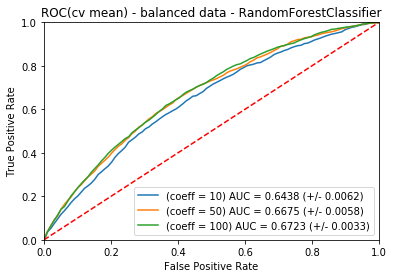

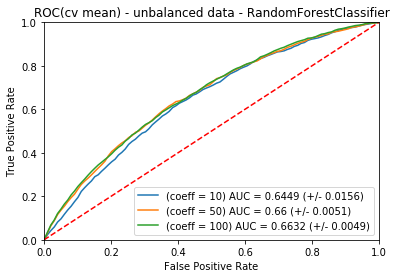

RandomForestClassifier - Perfomance


accuracy  sensitivity  specivity  precision  f1 score
coeff_value balanced                                                       
10          False     0.910428     0.000000   0.999939   0.999939  0.000000
            True      0.565190     0.658439   0.556022   0.556022  0.602732
50          False     0.910483     0.000000   1.000000   1.000000  0.000000
            True      0.589074     0.667700   0.581344   0.581344  0.621473
100         False     0.910483     0.000000   1.000000   1.000000  0.000000
            True      0.592504     0.667693   0.585110   0.585110  0.623511

In [29]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_name = 'GradientBoostingClassifier'
coeff_range = (10, 50, 100)

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = GradientBoostingClassifier(n_estimators = c, max_depth = 5, learning_rate = 0.1, random_state = 420)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=10 at 2019-11-19 09:10:50.461603
starting to run cv 0, balanced=True at 2019-11-19 09:10:50.462600
finished to run cv 0, balanced=True at 2019-11-19 09:10:52.075814
starting to run cv 0, balanced=False at 2019-11-19 09:10:52.075814
finished to run cv 0, balanced=False at 2019-11-19 09:11:00.671192
starting to run cv 1, balanced=True at 2019-11-19 09:11:00.671192
finished to run cv 1, balanced=True at 2019-11-19 09:11:02.211599
starting to run cv 1, balanced=False at 2019-11-19 09:11:02.212597
finished to run cv 1, balanced=False at 2019-11-19 09:11:11.056042
starting to run cv 2, balanced=True at 2019-11-19 09:11:11.056042
finished to run cv 2, balanced=True at 2019-11-19 09:11:12.562529
starting to run cv 2, balanced=False at 2019-11-19 09:11:12.563527
finished to run cv 2, balanced=False at 2019-11-19 09:11:21.868315
starting to run cv 3, balanced=True at 2019-11-19 09:11:21.868315
finished to run cv 3, balanced=True at 2019-11-19 09:11:23.504959
starting to run cv 

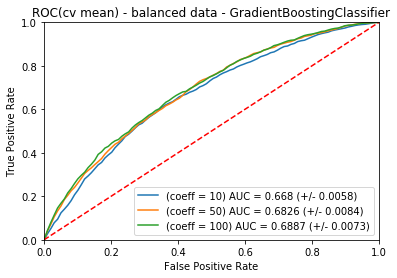

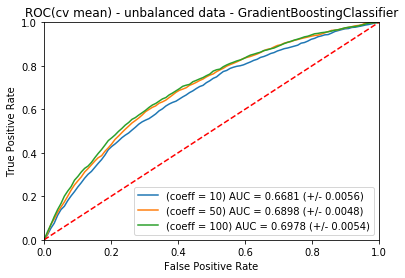

GradientBoostingClassifier - Perfomance


accuracy  sensitivity  specivity  precision  f1 score
coeff_value balanced                                                       
10          False     0.910483     0.001236   0.999879   0.999879  0.002466
            True      0.584541     0.671411   0.576001   0.576001  0.619832
50          False     0.910152     0.003089   0.999332   0.999332  0.006152
            True      0.613071     0.641136   0.610312   0.610312  0.625311
100         False     0.909488     0.003089   0.998603   0.998603  0.006152
            True      0.624683     0.645467   0.622639   0.622639  0.633811

In [31]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()

In [ ]:
print("hello")

In [20]:
from sklearn.svm import SVC

classifier_name = 'SVC'
coeff_range = ('linear','rbf','poly')

#Testing max forest sizes
for c in coeff_range:
    print("starting to run c=" + str(c) + " at " + str(datetime.now(tz=None)))
    classifier = SVC(kernel = c, C = 1, probability = True, gamma = 'auto', random_state = 420, cache_size=1999)
    run_classifier(classifier, classifier_name, c)
    print("finished to run c=" + str(c) + " at " + str(datetime.now(tz=None)))

starting to run c=linear at 2019-11-18 21:24:54.188920
starting to run cv 0, balanced=True at 2019-11-18 21:24:54.188920
finished to run cv 0, balanced=True at 2019-11-18 21:26:02.986121
starting to run cv 0, balanced=False at 2019-11-18 21:26:02.986121
finished to run cv 0, balanced=False at 2019-11-19 00:18:55.840752
starting to run cv 1, balanced=True at 2019-11-19 00:18:55.840752
finished to run cv 1, balanced=True at 2019-11-19 00:20:08.721774
starting to run cv 1, balanced=False at 2019-11-19 00:20:08.721774
finished to run cv 1, balanced=False at 2019-11-19 02:33:39.634493
starting to run cv 2, balanced=True at 2019-11-19 02:33:39.634493
finished to run cv 2, balanced=True at 2019-11-19 02:34:53.829410
starting to run cv 2, balanced=False at 2019-11-19 02:34:53.830407
finished to run cv 2, balanced=False at 2019-11-19 05:43:57.564783
starting to run cv 3, balanced=True at 2019-11-19 05:43:57.564783
finished to run cv 3, balanced=True at 2019-11-19 05:45:06.760520
starting to run

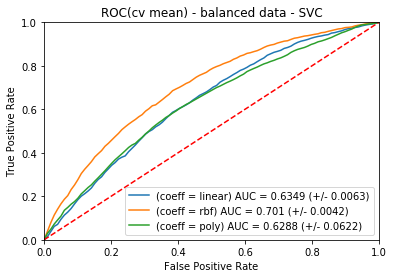

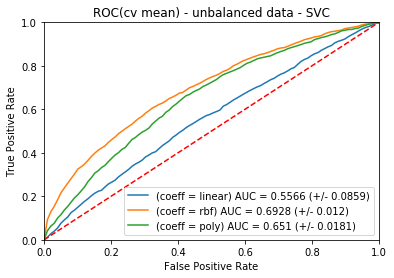

SVC - Perfomance


accuracy  sensitivity  specivity  precision  f1 score
coeff_value balanced                                                       
linear      False     0.910317     0.000000   0.999818   0.999818  0.000000
            True      0.587692     0.613970   0.585110   0.585110  0.598836
poly        False     0.909433     0.017913   0.997085   0.997085  0.035187
            True      0.301727     0.901167   0.242790   0.242790  0.382023
rbf         False     0.910539     0.000617   1.000000   1.000000  0.001232
            True      0.625290     0.678809   0.620028   0.620028  0.648069

In [21]:
#Evaluate perfomance
plot_roc(classifier_name, coeff_range)
print(classifier_name+" - Perfomance")
cv_perf.loc[classifier_name].groupby(['coeff_value','balanced']).mean()

In [ ]:
###################
#Ab hier Fundgrube#
###################

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    sound_features_scaled, popularities, test_size=0.2, random_state=42, stratify=None)

In [ ]:
from sklearn.linear_model import LinearRegression

regressionmodel = LinearRegression()
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
print(regressionmodel.coef_)
predictions = regressionmodel.predict(data_test)

In [ ]:
from sklearn.svm import SVR

regressionmodel = SVR()
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
predictions = regressionmodel.predict(data_test)

In [ ]:
from sklearn.linear_model import SGDRegressor

regressionmodel = SGDRegressor(max_iter=10000)
regressionmodel.fit(data_train, target_train)
print(regressionmodel.score(data_train, target_train))
predictions = regressionmodel.predict(data_test)

In [ ]:
print(target_test)
print(np.mean(predictions), np.max(predictions), np.min(predictions))

In [ ]:
predictions[predictions < 0] = 0
predictions[predictions > 100] = 100

In [ ]:
from sklearn.metrics import explained_variance_score, mean_squared_error
print(explained_variance_score(predictions, target_test))
print(mean_squared_error(predictions, target_test))

In [ ]:
#scatter matrix mean top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"mean_C":"mean_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (0,1))
plt.show()

#scatter matrix min top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"min_C":"min_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (-0.5,0.5))
plt.show()

#scatter matrix max top 100
ax = scatter_matrix(chroma_sftf_short.loc[:,"max_C":"max_B"].astype(np.float), figsize = (20,20), marker = '+')
plt.setp(ax, xlim = (0.5,1.5))
plt.show()

In [1]:
import dill

In [33]:
dill.dump_session("C:/Data/sessiondump.session")

In [2]:
dill.load_session("C:/Data/sessiondump.session")